In [61]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
%matplotlib inline

### Данные:
Будем работать с датасетом [The Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()

In [5]:
X, y = data['data'], data['target']

In [6]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

### Задание:
Будем решать задачу классификации на 3 класса. В качестве модели используется нейронная сеть с одним скрытым слоем. Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа нейронов скрытого слоя. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа нейронов скрытого слоя.

In [48]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [51]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [52]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [53]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 98.00% (4.27%)


In [57]:
### Your code here
accuracy_mass = []
for i in range(1, 21):
    def baseline_model():
        # create model
        model = Sequential()
        model.add(Dense(i, input_dim=4, activation='relu'))
        model.add(Dense(3, activation='softmax'))
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    results = cross_val_score(estimator, X, dummy_y, cv=kfold)
    accuracy_mass.append([i, results.mean()*100, results.std()*100])
    print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 44.00% (35.55%)
Baseline: 85.33% (21.25%)
Baseline: 89.33% (13.73%)
Baseline: 88.00% (25.44%)
Baseline: 95.33% (5.21%)
Baseline: 96.00% (5.33%)
Baseline: 96.00% (5.33%)
Baseline: 94.67% (8.33%)
Baseline: 96.67% (5.37%)
Baseline: 96.00% (4.42%)
Baseline: 98.67% (2.67%)
Baseline: 96.00% (4.42%)
Baseline: 97.33% (4.42%)
Baseline: 96.00% (4.42%)
Baseline: 96.00% (4.42%)
Baseline: 97.33% (4.42%)
Baseline: 97.33% (3.27%)
Baseline: 98.00% (4.27%)
Baseline: 96.00% (4.42%)
Baseline: 98.00% (3.06%)


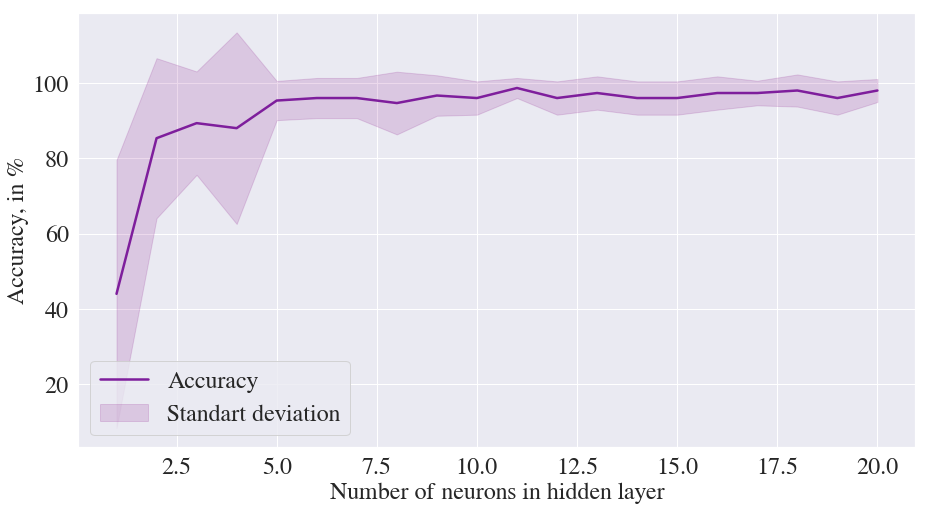

In [66]:
accuracy_mass = np.array(accuracy_mass).T

plt.figure(figsize=(15,8))

plt.plot(accuracy_mass[0], accuracy_mass[1], color='xkcd:purple', linewidth=2.5, label='Accuracy')
plt.fill_between(accuracy_mass[0], accuracy_mass[1]-accuracy_mass[2],
                 accuracy_mass[1]+accuracy_mass[2], color='purple', alpha=0.15, label='Standart deviation')
plt.xlabel('Number of neurons in hidden layer')
plt.ylabel('Accuracy, in %')
plt.legend()
plt.show()